In [4]:
from crocoddyl import *
import pinocchio as pin
import numpy as np

robot = loadBorinotArm()
robot.initViewer(loadModel=True)

q0 = [1, 0]
robot.q0.flat = q0
robot.framesForwardKinematics(robot.q0)
robot.display(robot.q0)

IDX_LINK1 = robot.model.getFrameId('link1', pin.FrameType.BODY)
IDX_LINK2 = robot.model.getFrameId('link2', pin.FrameType.BODY)
Mlink1 = robot.data.oMf[IDX_LINK1]
Mlink2 = robot.data.oMf[IDX_LINK2]

target_pos  = np.array([0,0,0.3])
target_quat = pin.Quaternion(1, 0, 0, 0)
target_quat.normalize()

Mref = pin.SE3()
Mref.translation = target_pos.reshape(3,1)
Mref.rotation = target_quat.matrix()

#robot.viewer.gui.addXYZaxis('world/framelink1', [1., 0., 0., 1.], .005, 0.05)
#robot.viewer.gui.addXYZaxis('world/framelink2', [1., 0., 0., 1.], .005, 0.05)
#robot.viewer.gui.addXYZaxis('world/frameref', [1., 0., 0., 1.], .005, 0.05)

#robot.viewer.gui.applyConfiguration('world/framelink1', pin.se3ToXYZQUATtuple(Mlink1))
#robot.viewer.gui.applyConfiguration('world/framelink2', pin.se3ToXYZQUATtuple(Mlink2))
#robot.viewer.gui.applyConfiguration('world/frameref', pin.se3ToXYZQUATtuple(Mref))

robot.viewer.gui.refresh()

In [2]:
import time 
dt = 0.01
t = np.arange(0,20,dt)
q0 = np.array([[1, 0]]).T

q = q0
q_d = np.zeros([2,1])
q_dd = np.zeros([2,1])

for i in range(len(t)):
    pin.computeAllTerms(robot.model, robot.data, q, q_d)
    M = robot.data.M
    Minv = np.linalg.inv(M)
    nle = robot.data.nle
    q_dd = np.dot(Minv, m2a(-nle)).T
    q_d = q_d + q_dd*dt
    q = q + q_d*dt + 0.5*q_dd*dt**2
    print q_dd
    robot.framesForwardKinematics(q)
    robot.display(q)
    time.sleep(0.01)

[[  93.15176057]
 [-100.95233909]]
[[  95.1553951 ]
 [-104.45794946]]
[[  98.19159569]
 [-109.66347816]]
[[ 101.61661877]
 [-115.21352198]]
[[ 104.3504008 ]
 [-118.83338266]]
[[ 104.94702875]
 [-117.45899913]]
[[ 102.02909726]
 [-108.10281188]]
[[ 95.06811118]
 [-89.44114824]]
[[ 84.93209721]
 [-62.98988501]]
[[ 73.48257624]
 [-32.42176162]]
[[62.43627103]
 [-1.39489727]]
[[52.51167401]
 [28.1096888 ]]
[[43.35191718]
 [55.93041804]]
[[33.87919303]
 [82.99405635]]
[[ 22.64832286]
 [110.58374745]]
[[  8.07518821]
 [139.91443544]]
[[-11.39054439]
 [171.96259884]]
[[-37.05841899]
 [207.45194649]]
[[-69.73111453]
 [246.97302948]]
[[-109.45948871]
 [ 291.29743047]]
[[-155.50270725]
 [ 341.97916252]]
[[-206.63334193]
 [ 402.15746329]]
[[-261.18987334]
 [ 476.23952964]]
[[-312.28049783]
 [ 559.97181071]]
[[-314.67489141]
 [ 576.24072914]]
[[-92.33138326]
 [193.79655734]]
[[ 329.07898367]
 [-552.71548546]]
[[ 440.9477484 ]
 [-738.07762733]]
[[ 395.67567939]
 [-663.98638258]]
[[ 340.87973586]
 [

[[  90.33449251]
 [-124.80817498]]
[[  90.37671213]
 [-123.46611657]]
[[  89.15410234]
 [-120.12431657]]
[[  86.54230745]
 [-114.56037408]]
[[  82.11993923]
 [-105.91581758]]
[[ 75.30306756]
 [-92.96634312]]
[[ 65.61842336]
 [-74.67001323]]
[[ 53.11041528]
 [-50.98669374]]
[[ 38.65767202]
 [-23.53043587]]
[[23.83370996]
 [ 4.66821104]]
[[10.25422951]
 [30.41997493]]
[[-1.09974879]
 [51.71085387]]
[[-10.07816033]
 [ 68.11855719]]
[[-17.1022313 ]
 [ 80.34023695]]
[[-22.79365649]
 [ 89.49249784]]
[[-27.72331849]
 [ 96.6336865 ]]
[[-32.30508202]
 [102.56277644]]
[[-36.77369191]
 [107.77927819]]
[[-41.18842914]
 [112.49142634]]
[[-45.42693705]
 [116.60283307]]
[[-49.14851387]
 [119.63621501]]
[[-51.71469899]
 [120.56901433]]
[[-52.0749221 ]
 [117.59357254]]
[[-48.69332201]
 [107.94537104]]
[[-39.75132371]
 [ 88.24883019]]
[[-24.01391781]
 [ 56.13177876]]
[[-2.36938831]
 [13.14613382]]
[[ 21.31713272]
 [-33.58834009]]
[[ 41.88453144]
 [-74.54417168]]
[[  55.97818031]
 [-103.62270032]]
[[  63

[[  5.22529891]
 [-26.08619124]]
[[  2.03923613]
 [-17.60139138]]
[[-1.75883167]
 [-7.93442528]]
[[-5.85312626]
 [ 2.31891017]]
[[-9.86504378]
 [12.44896505]]
[[-13.41694752]
 [ 21.74939083]]
[[-16.19484906]
 [ 29.63154828]]
[[-17.98805153]
 [ 35.69564408]]
[[-18.69719963]
 [ 39.74343651]]
[[-18.31733761]
 [ 41.74569548]]
[[-16.91000722]
 [ 41.79105297]]
[[-14.57689917]
 [ 40.03941737]]
[[-11.44169879]
 [ 36.69167048]]
[[-7.64113512]
 [31.97665401]]
[[-3.32277655]
 [26.15003868]]
[[ 1.35425936]
 [19.49732129]]
[[ 6.21941126]
 [12.33370002]]
[[11.09418229]
 [ 4.99606912]]
[[15.79980192]
 [-2.1738405 ]]
[[20.16779409]
 [-8.85215759]]
[[ 24.05080743]
 [-14.75570573]]
[[ 27.3308793 ]
 [-19.65909833]]
[[ 29.92336646]
 [-23.40254041]]
[[ 31.77646421]
 [-25.89032815]]
[[ 32.86769214]
 [-27.08304756]]
[[ 33.19936127]
 [-26.98777083]]
[[ 32.79477064]
 [-25.64998115]]
[[ 31.69600906]
 [-23.14913964]]
[[ 29.96318798]
 [-19.59761492]]
[[ 27.67409122]
 [-15.14091391]]
[[24.92288285]
 [-9.95635924]]

[[-14.03692782]
 [ -1.72672214]]
[[-12.19779371]
 [ -4.85253775]]
[[-10.30655944]
 [ -7.94917811]]
[[ -8.42218994]
 [-10.90440918]]
[[ -6.60097429]
 [-13.61169387]]
[[ -4.8956649 ]
 [-15.97220242]]
[[ -3.35501971]
 [-17.89601942]]
[[ -2.02349804]
 [-19.30295996]]
[[ -0.9407692 ]
 [-20.12359428]]
[[ -0.14067911]
 [-20.30112729]]
[[  0.35059851]
 [-19.79465137]]
[[  0.51731571]
 [-18.58396781]]
[[  0.3576133 ]
 [-16.67565959]]
[[ -0.11285076]
 [-14.10945581]]
[[ -0.85798307]
 [-10.96330957]]
[[-1.82010066]
 [-7.35526872]]
[[-2.92147275]
 [-3.44043215]]
[[-4.06899105]
 [ 0.59780158]]
[[-5.16161189]
 [ 4.56153149]]
[[-6.09940351]
 [ 8.25504266]]
[[-6.79254198]
 [11.50133984]]
[[-7.16865495]
 [14.15560308]]
[[-7.17747587]
 [16.1137052 ]]
[[-6.79257206]
 [17.31541542]]
[[-6.01060805]
 [17.74318601]]
[[-4.84897797]
 [17.41806797]]
[[-3.3426539 ]
 [16.39428105]]
[[-1.54086559]
 [14.75349916]]
[[ 0.4960864 ]
 [12.59931968]]
[[ 2.69984265]
 [10.0519133 ]]
[[4.99691979]
 [7.24262646]]
[[7.3116751

[[-11.77879327]
 [  1.52509413]]
[[-11.37296155]
 [  0.70699778]]
[[-10.83460127]
 [ -0.26649871]]
[[-10.18459243]
 [ -1.35595626]]
[[-9.44630703]
 [-2.51750086]]
[[-8.64481107]
 [-3.70436254]]
[[-7.80604784]
 [-4.86846429]]
[[-6.95602537]
 [-5.96201388]]
[[-6.12002398]
 [-6.93906228]]
[[-5.32183035]
 [-7.75700789]]
[[-4.58299612]
 [-8.37804153]]
[[-3.92211436]
 [-8.77053715]]
[[-3.35410966]
 [-8.91039047]]
[[-2.88954935]
 [-8.78228956]]
[[-2.53400334]
 [-8.38086744]]
[[-2.28750521]
 [-7.71164288]]
[[-2.14419124]
 [-6.79161329]]
[[-2.09220892]
 [-5.64933725]]
[[-2.11398373]
 [-4.32434917]]
[[-2.18690742]
 [-2.86579531]]
[[-2.28446261]
 [-1.33026818]]
[[-2.37773517]
 [ 0.22106763]]
[[-2.4372003 ]
 [ 1.72584691]]
[[-2.43461848]
 [ 3.12407045]]
[[-2.34485572]
 [ 4.36152634]]
[[-2.14745468]
 [ 5.39274968]]
[[-1.82782576]
 [ 6.18328203]]
[[-1.37798601]
 [ 6.71110032]]
[[-0.79683484]
 [ 6.96719505]]
[[-0.09000487]
 [ 6.95536612]]
[[0.73064293]
 [6.69135882]]
[[1.64779865]
 [6.201483  ]]
[[2.

[[-7.62740993]
 [-0.54645939]]
[[-7.55715306]
 [-0.77417943]]
[[-7.41448723]
 [-1.06833061]]
[[-7.2059283 ]
 [-1.41657285]]
[[-6.93944297]
 [-1.80410225]]
[[-6.62414862]
 [-2.2142239 ]]
[[-6.26998195]
 [-2.62898569]]
[[-5.88734623]
 [-3.02985384]]
[[-5.48674662]
 [-3.39841107]]
[[-5.07842333]
 [-3.71705794]]
[[-4.67199198]
 [-3.96969827]]
[[-4.27610076]
 [-4.14238885]]
[[-3.89811459]
 [-4.22393348]]
[[-3.54383734]
 [-4.20639935]]
[[-3.21728428]
 [-4.08553274]]
[[-2.92051798]
 [-3.86104943]]
[[-2.65356124]
 [-3.53677501]]
[[-2.41439939]
 [-3.12061301]]
[[-2.1990819 ]
 [-2.62432382]]
[[-2.00192774]
 [-2.06310724]]
[[-1.81583225]
 [-1.45499413]]
[[-1.6326649 ]
 [-0.82006836]]
[[-1.4437384 ]
 [-0.17955593]]
[[-1.24032199]
 [ 0.44516762]]
[[-1.01416653]
 [ 1.03359096]]
[[-0.75800672]
 [ 1.56703724]]
[[-0.46600729]
 [ 2.0295297 ]]
[[-0.13412536]
 [ 2.40850046]]
[[0.23963179]
 [2.6953041 ]]
[[0.65506494]
 [2.88551413]]
[[1.10976002]
 [2.97899664]]
[[1.59917852]
 [2.97977042]]
[[2.11684947]
 [

[[-4.79624573]
 [-1.68009558]]
[[-4.63775844]
 [-1.81992625]]
[[-4.45587334]
 [-1.95429121]]
[[-4.2548355 ]
 [-2.07619773]]
[[-4.03890204]
 [-2.17885666]]
[[-3.81219197]
 [-2.25596393]]
[[-3.57854325]
 [-2.30196728]]
[[-3.34138216]
 [-2.31230793]]
[[-3.10361005]
 [-2.28362765]]
[[-2.86751235]
 [-2.21393193]]
[[-2.63469409]
 [-2.10270116]]
[[-2.40604562]
 [-1.95094301]]
[[-2.18174105]
 [-1.76118133]]
[[-1.96127086]
 [-1.53737932]]
[[-1.74350833]
 [-1.28479766]]
[[-1.52680775]
 [-1.00979188]]
[[-1.30913053]
 [-0.71955659]]
[[-1.08819328]
 [-0.42182767]]
[[-0.86163072]
 [-0.12455662]]
[[-0.62716462]
 [ 0.16442701]]
[[-0.38276986]
 [ 0.43774752]]
[[-0.12682838]
 [ 0.6887923 ]]
[[0.14173737]
 [0.91198248]]
[[0.42335854]
 [1.10299148]]
[[0.71774696]
 [1.25890131]]
[[1.02385851]
 [1.37829016]]
[[1.3398938 ]
 [1.46124897]]
[[1.66333552]
 [1.50932841]]
[[1.99101926]
 [1.52542146]]
[[2.31923378]
 [1.51358945]]
[[2.64384493]
 [1.47884197]]
[[2.96043694]
 [1.42688243]]
[[3.26446432]
 [1.36383204]]

[[-2.45105308]
 [-1.38734164]]
[[-2.28627066]
 [-1.33504374]]
[[-2.11708409]
 [-1.26494602]]
[[-1.94430868]
 [-1.17741322]]
[[-1.76851545]
 [-1.07338765]]
[[-1.59003967]
 [-0.9543632 ]]
[[-1.40900134]
 [-0.82233591]]
[[-1.22533686]
 [-0.6797328 ]]
[[-1.03884042]
 [-0.52932199]]
[[-0.84921303]
 [-0.37410771]]
[[-0.656117  ]
 [-0.21721507]]
[[-0.45923284]
 [-0.06176958]]
[[-0.25831598]
 [ 0.08922281]]
[[-0.05325022]
 [ 0.23298971]]
[[0.1559048 ]
 [0.36709509]]
[[0.36887448]
 [0.48952604]]
[[0.5851406 ]
 [0.59875981]]
[[0.80392444]
 [0.69380826]]
[[1.02418256]
 [0.77423807]]
[[1.24461545]
 [0.84016632]]
[[1.46368844]
 [0.89223223]]
[[1.67966408]
 [0.93154688]]
[[1.89064415]
 [0.95962378]]
[[2.09461965]
 [0.97829398]]
[[2.28952626]
 [0.98960968]]
[[2.47330311]
 [0.99574117]]
[[2.64395219]
 [0.99887138]]
[[2.79959619]
 [1.00109293]]
[[2.93853234]
 [1.0043117 ]]
[[3.05928039]
 [1.0101609 ]]
[[3.16062283]
 [1.01992891]]
[[3.24163626]
 [1.03450342]]
[[3.3017126 ]
 [1.05433396]]
[[3.34056988]
 

In [13]:
state = StatePinocchio(robot.model)

xRegCost = CostModelState(robot.model, state, ref=state.zero(), nu=1)
uRegCost = CostModelControl(robot.model, nu = 1)
xPendCost = CostModelDoublePendulum(robot.model, 
                                    frame=state, 
                                    ref=state.zero, 
                                    nu=1,
                                    activation=ActivationModelWeightedQuad(np.array([1]*4+[0.001]*2))) 

runningCostModel = CostModelSum(robot.model, nu=1)
terminalCostModel = CostModelSum(robot.model, nu=1)

runningCostModel.addCost(name="regx", weight=1e-6, cost=xRegCost)
runningCostModel.addCost(name="regu", weight=1e-6, cost=uRegCost)
runningCostModel.addCost(name="pend", weight=1, cost=xPendCost)
terminalCostModel.addCost(name="ori2", weight=100, cost=xPendCost)

In [14]:
actModel = ActuationModelDoublePendulum(robot.model)
runningModel = IntegratedActionModelEuler(DifferentialActionModelUAM(robot.model, actModel, runningCostModel))
terminalModel = IntegratedActionModelEuler(DifferentialActionModelUAM(robot.model, actModel, terminalCostModel))

In [18]:
# Defining the time duration for running action models and the terminal one
dt = 5e-2
runningModel.timeStep = dt

# For this optimal control problem, we define 250 knots (or running action
# models) plus a terminal knot
T = 50
x0 = np.array([3.14, 0, 0., 0. ])
problem = ShootingProblem(x0, [runningModel] * T, terminalModel)

In [19]:
# Creating the DDP solver for this OC problem, defining a logger
ddp = SolverFDDP(problem)
ddp.callback = [CallbackDDPVerbose()]
ddp.callback.append(CallbackDDPLogger())

# Solving it with the DDP algorithm
ddp.solve()

iter 	 cost 	      stop 	    grad 	  xreg 	      ureg 	 step 	 feas
   0  2.83982e+01  9.27808e+00  -3.85416e+05  1.00000e+01  1.00000e+01   0.0312     0
   1  6.95634e+01  1.20638e+06  -4.07604e+05  1.00000e+01  1.00000e+01   0.0156     0
   2  1.59378e+02  1.68478e+06  -4.41648e+05  1.00000e+01  1.00000e+01   0.0156     0
   3  1.81440e+02  2.44201e+06  -5.21164e+05  1.00000e+01  1.00000e+01   0.0078     0
   4  2.20343e+02  2.25083e+06  -5.73673e+05  1.00000e+01  1.00000e+01   0.0156     0
   5  2.26017e+02  2.08305e+06  -8.98806e+05  1.00000e+01  1.00000e+01   0.0039     0
   6  2.26691e+02  2.05176e+06  -1.02668e+06  1.00000e+01  1.00000e+01   0.0039     0
   7  2.19081e+02  2.11255e+06  -1.19586e+06  1.00000e+01  1.00000e+01   0.0039     0
   8  2.14579e+02  2.53114e+06  -1.45523e+06  1.00000e+02  1.00000e+02   0.0020     0
   9  2.07156e+02  2.36532e+06  -1.59605e+07  1.00000e+02  1.00000e+02   0.0039     0
iter 	 cost 	      stop 	    grad 	  xreg 	      ureg 	 step 	 feas
  10

  89  1.95697e+06  5.19755e+08  3.90155e+02  1.00000e+02  1.00000e+02   1.0000     1
iter 	 cost 	      stop 	    grad 	  xreg 	      ureg 	 step 	 feas
  90  1.95658e+06  5.19486e+08  3.90165e+02  1.00000e+02  1.00000e+02   1.0000     1
  91  1.95619e+06  5.19224e+08  3.90174e+02  1.00000e+02  1.00000e+02   1.0000     1
  92  1.95580e+06  5.18969e+08  3.90183e+02  1.00000e+02  1.00000e+02   1.0000     1
  93  1.95541e+06  5.18721e+08  3.90191e+02  1.00000e+02  1.00000e+02   1.0000     1
  94  1.95502e+06  5.18479e+08  3.90198e+02  1.00000e+02  1.00000e+02   1.0000     1
  95  1.95463e+06  5.18243e+08  3.90205e+02  1.00000e+02  1.00000e+02   1.0000     1
  96  1.95424e+06  5.18013e+08  3.90210e+02  1.00000e+02  1.00000e+02   1.0000     1
  97  1.95385e+06  5.17789e+08  3.90214e+02  1.00000e+02  1.00000e+02   1.0000     1
  98  1.95346e+06  5.17569e+08  3.90217e+02  1.00000e+02  1.00000e+02   1.0000     1
  99  1.95307e+06  5.17354e+08  3.90219e+02  1.00000e+02  1.00000e+02   1.0000    

([array([3.14, 0.  , 0.  , 0.  ]),
  array([  3.61148394,  -0.81805022,   9.42967882, -16.36100431]),
  array([  4.86750785,  -2.63430672,  25.12047811, -36.32513002]),
  array([  4.90181205,  -3.30834939,   0.68608406, -13.48085354]),
  array([  5.13704949,  -3.85732504,   4.70474872, -10.97951293]),
  array([ 5.27053136, -4.21491356,  2.66963739, -7.15177042]),
  array([ 5.10096685, -4.23035985, -3.39129009, -0.30892575]),
  array([ 4.61449776, -3.91774769, -9.72938187,  6.2522432 ]),
  array([  3.71607371,  -3.41562815, -17.96848093,  10.04239083]),
  array([  2.91858252,  -3.05025842, -15.9498238 ,   7.30739446]),
  array([ 2.44622551, -2.75284526, -9.4471403 ,  5.94826334]),
  array([ 2.13954992, -2.50056558, -6.13351181,  5.0455936 ]),
  array([ 2.11334426, -2.38573774, -0.52411312,  2.29655681]),
  array([ 2.22425181, -2.38281567,  2.21815101,  0.05844139]),
  array([ 2.3233763 , -2.39666355,  1.98248986, -0.27695765]),
  array([ 2.38620184, -2.40215391,  1.25651065, -0.1098073 

In [20]:
displayTrajectory(robot, ddp.xs, runningModel.timeStep)

4.95

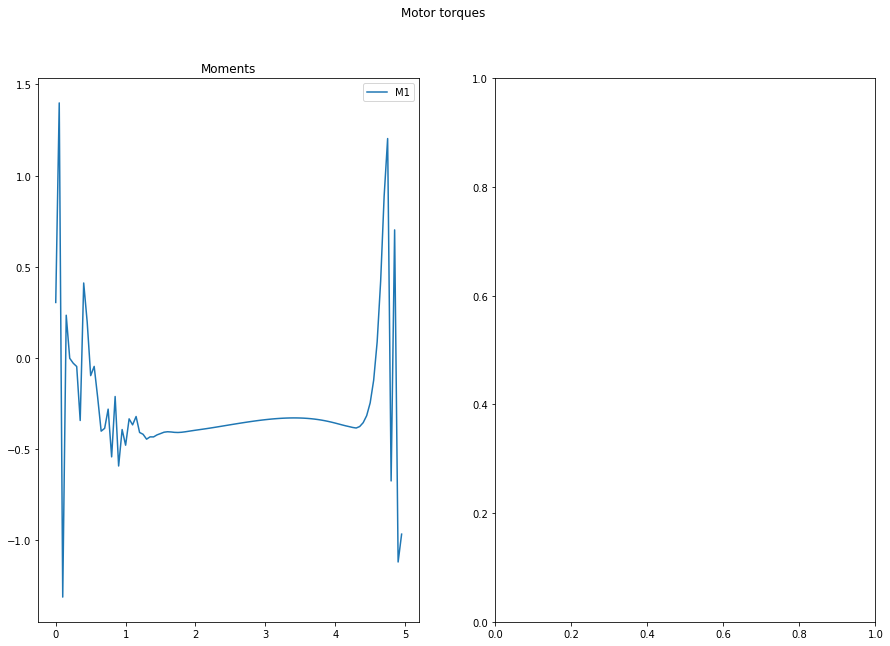

In [12]:
import numpy as np
import matplotlib.pyplot as plt

control = np.vstack(ddp.us)
t = np.arange(0,T*dt, dt)
fig, axs = plt.subplots(1,2, figsize=(15,10))
fig.suptitle('Motor torques')
# axs[0].plot(t,control[:,0], t,control[:,1])
axs[0].plot(t,control[:,0])
axs[0].set_title('Moments')
axs[0].legend(['M1','M2'])

t_state = t
t_state[-1]